In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset into pandas dataframe
original = pd.read_csv('original.csv')

In [3]:
shuffle_data = original.sample(frac=1).reset_index(drop=True)
shuffle_data.to_csv('newfile.csv')

In [4]:
col=["ts","id.orig_h","id.orig_p","id.resp_h","id.resp_p","proto","duration","orig_bytes","resp_bytes","conn_state","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes","Label"]

In [5]:
shuffle_data = pd.read_csv('newfile.csv',sep=',', names= col,header=None)
shuffle_data=shuffle_data.reset_index(drop=True)
print(shuffle_data)

                ts        id.orig_h  id.orig_p        id.resp_h  id.resp_p  \
0     1.533886e+09    192.168.0.104      46062    88.221.214.42         80   
1     1.551087e+09    192.168.0.105      54210    192.168.0.104       3268   
2     1.544120e+09    192.168.0.104          0    5.230.212.215       1464   
3     1.552755e+09    192.168.0.104      46956   192.30.253.124        443   
4     1.544120e+09    192.168.0.104          0    192.194.74.16      10594   
5     1.552755e+09    192.168.0.104      38956   192.30.253.116        443   
6     1.552754e+09    192.168.0.104      50288   104.16.121.145        443   
7     1.545581e+09    22.103.67.185          8    192.168.0.102          0   
8     1.544120e+09    192.168.0.104          0    149.56.45.192      35498   
9     1.544120e+09    192.168.0.104          0    105.56.217.74       1448   
10    1.545581e+09   113.112.205.98          8    192.168.0.102          0   
11    1.544120e+09    192.168.0.104          0   145.232.235.74 

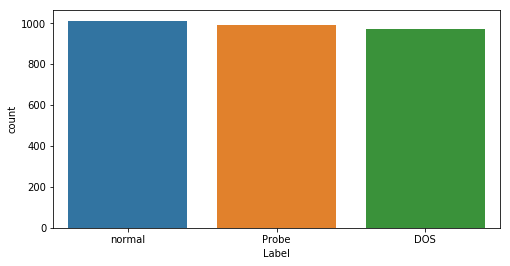

In [6]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='Label', data=shuffle_data);

In [7]:
# one hot encoding the labels
data_label=shuffle_data.Label
print(data_label.shape)
label_encode= preprocessing.LabelEncoder()
label_encode.fit(data_label)
print(label_encode.classes_)
trans_label= label_encode.transform(data_label) 
print(trans_label)
encoder = preprocessing.OneHotEncoder()
trans_label= pd.DataFrame(trans_label)
encoder.fit(trans_label)
onehotlabels = encoder.transform(trans_label).toarray()
onehotlabels.shape
print(onehotlabels)
np.savetxt('encodedlabel.csv',onehotlabels,fmt='%5s',delimiter=',',newline='\n')

(2972,)
['DOS' 'Probe' 'normal']
[2 1 0 ... 0 2 0]


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [8]:
new_shuffle_data=shuffle_data.drop(labels=['Label'],axis=1)
print(new_shuffle_data)

                ts        id.orig_h  id.orig_p        id.resp_h  id.resp_p  \
0     1.533886e+09    192.168.0.104      46062    88.221.214.42         80   
1     1.551087e+09    192.168.0.105      54210    192.168.0.104       3268   
2     1.544120e+09    192.168.0.104          0    5.230.212.215       1464   
3     1.552755e+09    192.168.0.104      46956   192.30.253.124        443   
4     1.544120e+09    192.168.0.104          0    192.194.74.16      10594   
5     1.552755e+09    192.168.0.104      38956   192.30.253.116        443   
6     1.552754e+09    192.168.0.104      50288   104.16.121.145        443   
7     1.545581e+09    22.103.67.185          8    192.168.0.102          0   
8     1.544120e+09    192.168.0.104          0    149.56.45.192      35498   
9     1.544120e+09    192.168.0.104          0    105.56.217.74       1448   
10    1.545581e+09   113.112.205.98          8    192.168.0.102          0   
11    1.544120e+09    192.168.0.104          0   145.232.235.74 

In [9]:
# changing the nominal values to binary
for i in range(len(new_shuffle_data.columns)):
    count = i+0
    name = new_shuffle_data.columns[count]
    if name== 'id.orig_h' :
#         print(new_shuffle_data[name])
        label_encode = preprocessing.LabelEncoder()
        label_encode.fit(new_shuffle_data[name])
        encodedidorig= label_encode.transform(new_shuffle_data[name])
#         print(encodedidorig)
        x= np.reshape(encodedidorig,(-1))
#         print(new1)
        new_df1= pd.DataFrame({'id.orig_h': x})
        new_shuffle_data.update(new_df1, overwrite= True)
        print(new_shuffle_data)
    elif name=='id.resp_h':
        label_encode = preprocessing.LabelEncoder()
        label_encode.fit(new_shuffle_data[name])
        encodedidorig= label_encode.transform(new_shuffle_data[name])
        x= np.reshape(encodedidorig,(-1))
        new_df1= pd.DataFrame({'id.resp_h': x})
        new_shuffle_data.update(new_df1, overwrite= True)
    elif name=='proto':
        label_encode = preprocessing.LabelEncoder()
        label_encode.fit(new_shuffle_data[name])
        encodedidorig= label_encode.transform(new_shuffle_data[name])
        x= np.reshape(encodedidorig,(-1))
        new_df1= pd.DataFrame({'proto': x})
        new_shuffle_data.update(new_df1, overwrite= True)
    elif name=='conn_state':
        label_encode = preprocessing.LabelEncoder()
        label_encode.fit(new_shuffle_data[name])
        encodedidorig= label_encode.transform(new_shuffle_data[name])
        x= np.reshape(encodedidorig,(-1))
        new_df1= pd.DataFrame({'conn_state': x})
        new_shuffle_data.update(new_df1, overwrite= True)
    
print new_shuffle_data.dtypes
# print(new_shuffle_data)

                ts id.orig_h  id.orig_p        id.resp_h  id.resp_p proto  \
0     1.533886e+09       108      46062    88.221.214.42         80   tcp   
1     1.551087e+09       109      54210    192.168.0.104       3268   tcp   
2     1.544120e+09       108          0    5.230.212.215       1464   tcp   
3     1.552755e+09       108      46956   192.30.253.124        443   tcp   
4     1.544120e+09       108          0    192.194.74.16      10594   tcp   
5     1.552755e+09       108      38956   192.30.253.116        443   tcp   
6     1.552754e+09       108      50288   104.16.121.145        443   tcp   
7     1.545581e+09       125          8    192.168.0.102          0  icmp   
8     1.544120e+09       108          0    149.56.45.192      35498   tcp   
9     1.544120e+09       108          0    105.56.217.74       1448   tcp   
10    1.545581e+09        17          8    192.168.0.102          0  icmp   
11    1.544120e+09       108          0   145.232.235.74      20133   tcp   

In [10]:
for i in range(len(new_shuffle_data.columns)):
    count = i+0
    name = new_shuffle_data.columns[count]
    if new_shuffle_data[name].dtypes=='object' and name!= 'duration':
        print(name)
        new_shuffle_data[name]=new_shuffle_data[name].astype('int')


# new_shuffle_data=new_shuffle_data.astype('float')
print(new_shuffle_data.dtypes)

id.orig_h
id.resp_h
proto
conn_state
ts               float64
id.orig_h          int64
id.orig_p          int64
id.resp_h          int64
id.resp_p          int64
proto              int64
duration         float64
orig_bytes         int64
resp_bytes       float64
conn_state         int64
orig_pkts          int64
orig_ip_bytes      int64
resp_pkts          int64
resp_ip_bytes      int64
dtype: object


In [11]:
# min-max normalization
print(new_shuffle_data.shape)
normalized= ((new_shuffle_data-new_shuffle_data.min()))/(new_shuffle_data.max()-new_shuffle_data.min())
print(normalized)
np.savetxt('norm.csv',normalized,fmt='%5s',delimiter=',',newline='\n')
print(normalized.columns)
print(normalized.shape)

(2972, 14)
                ts  id.orig_h  id.orig_p  id.resp_h  id.resp_p  proto  \
0     9.832383e-07   0.529412   0.755288   0.959881   0.001223    0.5   
1     9.109042e-01   0.534314   0.888893   0.505201   0.049978    0.5   
2     5.419571e-01   0.529412   0.000000   0.790490   0.022389    0.5   
3     9.992320e-01   0.529412   0.769947   0.518574   0.006775    0.5   
4     5.419574e-01   0.529412   0.000000   0.511144   0.162015    0.5   
5     9.992500e-01   0.529412   0.638770   0.514116   0.006775    0.5   
6     9.992054e-01   0.529412   0.824583   0.031204   0.006775    0.5   
7     6.193119e-01   0.612745   0.000131   0.502229   0.000000    0.0   
8     5.419575e-01   0.529412   0.000000   0.191679   0.542874    0.5   
9     5.419571e-01   0.529412   0.000000   0.086181   0.022144    0.5   
10    6.193118e-01   0.083333   0.000131   0.502229   0.000000    0.0   
11    5.419576e-01   0.529412   0.000000   0.181278   0.307896    0.5   
12    6.193119e-01   0.583333   0.000131

In [12]:
# Discretization to binary
def func(new_datframe):
    temp= np.zeros((new_datframe.shape[0],new_datframe.shape[1]*10))
    for i in range(len(new_datframe.columns)):
        count=0+i
        x= pd.cut(new_datframe[count], 10)
        y= pd.get_dummies(x)
        temp[:,i*10:(i*10+10)] = y
    return temp

In [13]:
new_norm= pd.read_csv('norm.csv',header=None)
print(new_norm.shape[0],new_norm.shape[1])
discrete= func(new_norm)
print discrete
print(discrete.shape)
np.savetxt('feature_discretized.csv',discrete,fmt='%5s',delimiter=',',newline='\n')

(2972, 14)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2972, 140)


In [14]:
discrete= pd.read_csv('feature_discretized.csv',header=None)
x='a'
for i in range(0,20):
    discrete[x]=0
    i+=1
    x+='b'
print discrete.shape
discrete= np.asarray(discrete)
new_discrete=discrete.reshape(2972,20,8)
print(new_discrete.shape)

(2972, 160)
(2972, 20, 8)


In [15]:
# Greyscale conversion on all the data

temp = np.zeros((new_discrete.shape[0],new_discrete.shape[1]))
for i in range(new_discrete.shape[0]):
    for j in range(new_discrete.shape[1]):
        temp[i,j] = np.sum(2**np.arange(7,-1,-1)*new_discrete[i,j,:])
print(temp)
np.savetxt('grayscale.csv',temp,fmt='%5s',delimiter=',',newline='\n')

[[128.   1.   0. ...   0.   0.   0.]
 [  0.  65.   0. ...   0.   0.   0.]
 [  4.   1.   8. ...   0.   0.   0.]
 ...
 [  2.   0.  24. ...   0.   0.   0.]
 [  0.  65.   0. ...   0.   0.   0.]
 [  2.  16.   8. ...   0.   0.   0.]]


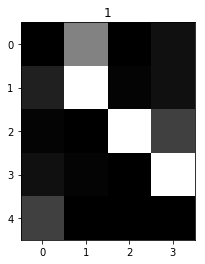

In [16]:
data= np.loadtxt('grayscale.csv', delimiter=',', dtype='float32')
label=np.loadtxt('encodedlabel.csv',delimiter=',',dtype='float32')
data= data.reshape(data.shape[0],5,4)
plt.figure(figsize=(5,4))
plt.imshow(data[1],cmap='gray')
plt.title(label[1].argmax());